In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf
import csv

In [3]:
###1. Load data:

In [31]:
df = pd.read_csv("National Universities Rankings_CLEANED.csv")

In [32]:
print(df.head())

   index                   name       location  rank  \
0      0   Princeton University  Princeton, NJ     1   
1      1     Harvard University  Cambridge, MA     2   
2      2  University of Chicago    Chicago, IL     3   
3      3        Yale University  New Haven, CT     3   
4      4    Columbia University   New York, NY     5   

                                         description  tuition_and_fees  \
0  Princeton, the fourth-oldest college in the Un...             45320   
1  Harvard is located in Cambridge, Massachusetts...             47074   
2  The University of Chicago, situated in Chicago...             52491   
3  Yale University, located in New Haven, Connect...             49480   
4  Columbia University, located in Manhattan's Mo...             55056   

   instate_tuition_and_fees  ug_enrollment  state_college  
0                       NaN           5402              0  
1                       NaN           6699              0  
2                       NaN           

In [33]:
print(df.columns)

Index(['index', 'name', 'location', 'rank', 'description', 'tuition_and_fees',
       'instate_tuition_and_fees', 'ug_enrollment', 'state_college'],
      dtype='object')


In [ ]:
###1.2) Variables of Analysis:

In [ ]:
###I will be using the undergrad enrollment and tuition and fees variables as the predictor (independent) variables, and the 
###rank as the response (dependent) variable for my analysis. The predictor variables represent the number of students enrolled
###as an undergraduate and how much each enrolled student is approximately paying for a university's resources and facilities.

In [ ]:
###1.3) Articulate Research Questions:

In [ ]:
###The predictor variables might predict the response variable because the rank will be determined on attendance and cost for
###attendance. I am expecting a negative relationship because if the higher the tuition and fees are, the lower the university
###rank will be. This will mean that there will be less students willing to enroll in the universities that have expensive
###tuition and fees, and select classes for those universities may not operate with enough students registered in which there
###would possibly be no jobs for professors who do not have a class to teach for an upcoming semester.

In [ ]:
###1.4) Univariate plots and details:

In [34]:
df.head()

,index,name,location,rank,description,tuition_and_fees,instate_tuition_and_fees,ug_enrollment,state_college
0,0,Princeton University,"Princeton, NJ",1,"Princeton, the fourth-oldest college in the Un...",45320,NaN,5402,0
1,1,Harvard University,"Cambridge, MA",2,"Harvard is located in Cambridge, Massachusetts...",47074,NaN,6699,0
2,2,University of Chicago,"Chicago, IL",3,"The University of Chicago, situated in Chicago...",52491,NaN,5844,0
3,3,Yale University,"New Haven, CT",3,"Yale University, located in New Haven, Connect...",49480,NaN,5532,0
4,4,Columbia University,"New York, NY",5,"Columbia University, located in Manhattan's Mo...",55056,NaN,6102,0


In [114]:
print(df["ug_enrollment"].mean())

14946.619047619048


In [115]:
print(df["tuition_and_fees"].mean())

33769.246753246756


In [ ]:
###Unlog-transformed undergraduate enrollment variable:

<AxesSubplot:xlabel='ug_enrollment', ylabel='Count'>

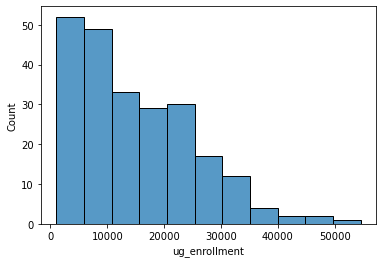

In [35]:
sns.histplot(x = "ug_enrollment", data = df)

In [ ]:
###The undergrad enrollment variable is not roughly distributed as a normal distribution, but a uniform distribution. 
###However this variable can be log transformed.

In [36]:
df['ug_enrollment'] = df['ug_enrollment']

In [37]:
df['logug_enrollment'] = np.log(df['ug_enrollment'])

In [38]:
df.to_csv('transformed_rank.csv', index = False)

In [40]:
newdata = pd.read_csv("transformed_rank.csv")

In [ ]:
###Log-transformed undergrad enrollment variable:

<AxesSubplot:xlabel='logug_enrollment', ylabel='Count'>

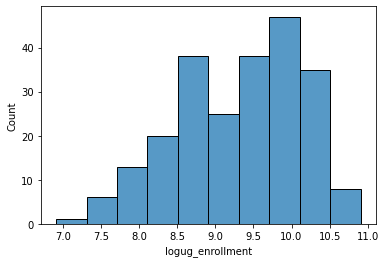

In [41]:
sns.histplot(x = "logug_enrollment", data = newdata)

In [ ]:
###Unlog-transformed tuition and fees variable:

<AxesSubplot:xlabel='tuition_and_fees', ylabel='Count'>

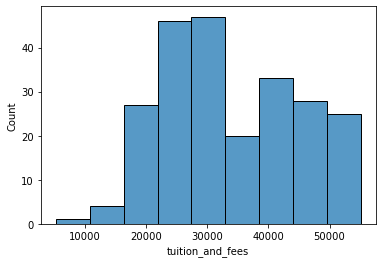

In [47]:
sns.histplot(x = "tuition_and_fees", data = newdata)

In [ ]:
###The tuition and fees variable is not roughly distributed as a normal distribution, but a uniform distribution. However, this
###variable can be log transformed.

In [42]:
df['logtuition_and_fees'] = np.log(df['tuition_and_fees'])

In [44]:
df.to_csv('transformed_rank.csv', index = False)

In [45]:
newdata = pd.read_csv("transformed_rank.csv")

In [ ]:
###Log-transformed tuition and fees variable:

<AxesSubplot:xlabel='logtuition_and_fees', ylabel='Count'>

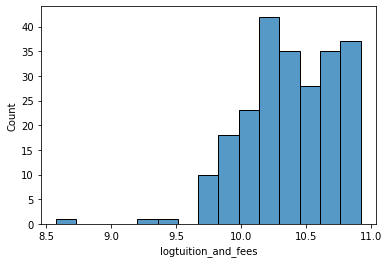

In [46]:
sns.histplot(x = "logtuition_and_fees", data = newdata)

<AxesSubplot:xlabel='rank', ylabel='Count'>

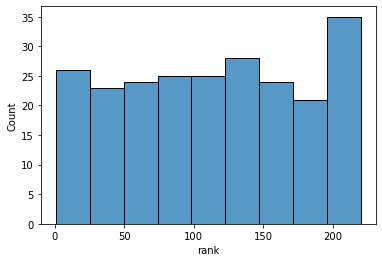

In [49]:
sns.histplot(x = "rank", data = df)

In [ ]:
###The rank variable is not roughly distributed as a normal distribution, but close to a uniform distribution. This variable 
###does not need to be log transformed as the values are clear to see.

In [ ]:
###1.5) Multivariate Plots:

<AxesSubplot:xlabel='ug_enrollment', ylabel='rank'>

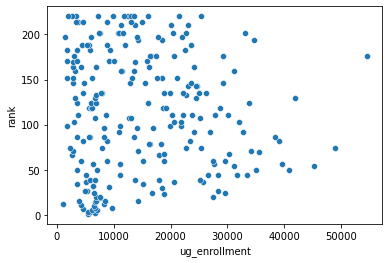

In [50]:
sns.scatterplot(x = "ug_enrollment", y = "rank", data = newdata)

<AxesSubplot:xlabel='tuition_and_fees', ylabel='rank'>

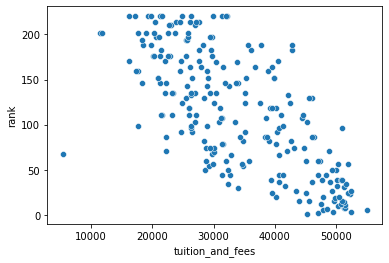

In [51]:
sns.scatterplot(x = "tuition_and_fees", y = "rank", data = newdata)

<AxesSubplot:xlabel='ug_enrollment', ylabel='tuition_and_fees'>

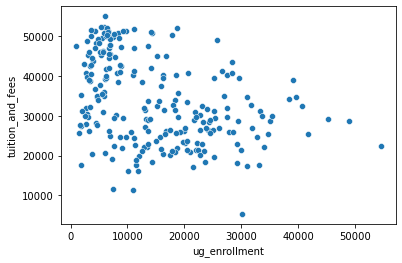

In [52]:
sns.scatterplot(x = "ug_enrollment", y = "tuition_and_fees", data = newdata)

In [ ]:
###The scatterplots of each predictor variable and the response variable are almost directly related but they do not pose a 
###problem because they make sense in conveying the interval of undergraduates attending more lower ranked schools at a cheaper
###cost.

In [ ]:
###1.6) Transformations for Model-Fitting:

In [ ]:
###Both the tuition and fees and undergrad enrollment variables should be transformed which are log-transformed above as
###logug_enrollment and logtuition_and_fees

In [89]:
newdata["zug_enrollment"] = (newdata["ug_enrollment"] - newdata["ug_enrollment"].mean())/newdata["ug_enrollment"].std()

In [88]:
newdata["ztuition_and_fees"] = (newdata["tuition_and_fees"] - newdata["tuition_and_fees"].mean())/newdata["tuition_and_fees"].std()

In [ ]:
###2. Model Fitting

In [90]:
MODEL = smf.ols("rank ~ 1 + zug_enrollment + ztuition_and_fees", data = newdata).fit()

In [91]:
print(MODEL.params)
print(MODEL.bse)

Intercept            113.982684
zug_enrollment       -24.572067
ztuition_and_fees    -56.679212
dtype: float64
Intercept            2.655217
zug_enrollment       2.884612
ztuition_and_fees    2.884612
dtype: float64


In [ ]:
###The estimates effects are negative compared to the standard errors in which they are not large in comparison to the standard
###errors. In magnitude, regard of positive or negative, the largest slope is the tuition and fees from the estimate effect.

In [ ]:
###3. Inference and Interpretation:

In [92]:
newdata["residuals"] = MODEL.resid

In [93]:
newdata["model_predictions"] = MODEL.predict()

In [94]:
print(MODEL.resid)
print(MODEL.predict())

0     -74.308706
1     -61.051326
2     -33.495835
3     -50.086679
4     -17.380586
         ...    
226    11.829837
227    63.336636
228    44.203923
229     5.660999
230    56.237185
Length: 231, dtype: float64
[ 75.30870583  63.05132629  36.49583541  53.08667853  22.38058622
  57.79078084  60.83979661  41.1076611   32.88252005  45.88016257
  45.61746218  73.64748149  39.37403238  40.53998225  24.90669126
  86.16466315  45.19491169  70.33765398  46.97416328  58.02388226
  42.74517024  50.97082395   7.79658891  37.45412619  49.66053481
  50.29810471  38.10517974  31.76453887  55.529653   105.14621667
  35.00917164  92.19833714  47.80375397  46.51672393 120.72220448
   8.35203649  72.3473065   64.28309161  20.25491678  43.72117074
  45.37533822  42.39783333  60.04062694  60.26135349  46.07687379
  46.77512356  84.06269282  53.13769948  80.55705168  54.87800128
  94.15311375  50.74169769  61.32394506  67.36694175  71.13195509
  26.99494671  46.41685947 105.37251087  51.84715595  56.75

<AxesSubplot:xlabel='residuals', ylabel='Count'>

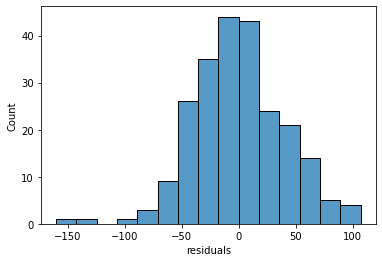

In [95]:
sns.histplot(x = "residuals", data = newdata)

<AxesSubplot:xlabel='model_predictions', ylabel='residuals'>

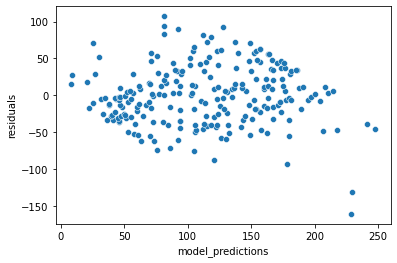

In [63]:
sns.scatterplot(x = "model_predictions", y = "residuals", data = newdata)

In [ ]:
###There are strong patterns within the -50 to 50 intervals that could indicate undergraduate students attending universities
###ranked 50 and above

In [ ]:
###3.2) Report null hypothesis significance tests for parameters:

In [64]:
MODEL.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,326.6666,11.585,28.197,0.000,303.839,349.495
ug_enrollment,-0.0023,0.000,-8.518,0.000,-0.003,-0.002
tuition_and_fees,-0.0053,0.000,-19.649,0.000,-0.006,-0.005


In [65]:
MODEL.pvalues

Intercept           2.838781e-76
ug_enrollment       2.215510e-15
tuition_and_fees    5.880577e-51
dtype: float64

In [ ]:
###The slope parameters for ug enrollment and tuition and fees variables are 2.215510e-15 and 5.880577e-51 respectively, and 
###was statistically significant from zero at the p < .05 level

In [ ]:
###3. Model comparison

In [66]:
MODEL_null = smf.ols("rank ~ 1", data = newdata).fit()

In [71]:
MODEL_null.aic

2592.1365472381267

In [67]:
MODEL.aic

2366.883694792466

In [68]:
MODEL.f_test("(ug_enrollment = 0, tuition_and_fees = 0)")

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=193.549189119037, p=7.326393039644206e-50, df_denom=228, df_num=2>

In [ ]:
###An F-Test comparing the model with no predictor to a model with two predictors was statistically significant at the p < .05
###level (F[2, 228]), indicating that the model with two predictors was a better model than the model with no predictors.

In [ ]:
###4. Interpretation:

In [98]:
df['sdtuition_and_fees'] = np.exp(df['logtuition_and_fees'])

In [99]:
df['sdug_enrollment'] = np.exp(df['logug_enrollment'])

In [101]:
print(MODEL.params)

Intercept            113.982684
zug_enrollment       -24.572067
ztuition_and_fees    -56.679212
dtype: float64


In [104]:
NEWMODEL = smf.ols("rank ~ 1 + sdtuition_and_fees + sdug_enrollment", data = df).fit()

In [105]:
print(NEWMODEL.params)

Intercept             326.666562
sdtuition_and_fees     -0.005269
sdug_enrollment        -0.002325
dtype: float64


In [ ]:
###Intercept-predictor -> exp(result)

In [ ]:
###For one standard deviation of tuition and fees (-0.005), the model predicts a change of approximately 2 ranks in the
###university rankings

In [ ]:
###For one standard deviation of UG enrollment (-0.002), the model predicts a change of approximately 2 ranks in the 
###university rankings

In [110]:
sd = df['sdtuition_and_fees'] / 4

In [111]:
print(sd)

0      11330.00
1      11768.50
2      13122.75
3      12370.00
4      13764.00
         ...   
226     4817.50
227     6569.25
228     5398.75
229     4023.50
230     4943.00
Name: sdtuition_and_fees, Length: 231, dtype: float64


In [112]:
sd2 = df['sdug_enrollment'] / 4

In [113]:
print(sd2)

0      1350.50
1      1674.75
2      1461.00
3      1383.00
4      1525.50
        ...   
226    1823.75
227    3392.25
228    3987.75
229    2960.00
230    6314.75
Name: sdug_enrollment, Length: 231, dtype: float64


In [ ]:
###If you increased the UG enrollment by approximately 326.66 and decrease the tuition and fees by approximately 326.66, 
###the overall predicted change in the university rankings would be 2.

In [ ]:
###Since the z-scores for the predictors are 2.884612 and the intercept is approximately 326.666562, the plus/minus uncertainty
###when adding and subtracting 2, and add 5.769224 to have the final predicion be 332.435786 and 320.897338.

In [ ]:
###exp(320.897338) is approximately 2.31 and exp(332.435786) is approximately 2.37 

In [ ]:
###In my model, as the tuition and fees increased, the undergraduate enrollment decreased, which was not surprising.
###In my data, the average undergraduate enrollment for a ranked university is approximately 14,947 students and the average 
###cost for tuition and fees for a ranked university is approximately $33,769. For a university that ranks 1 standard devation
###less than average, the model predicts a university, with a good amount of students, to be ranked 2 ranks below expected, 
###within a range of uncertainty with 0.884612 and 4.

In [ ]:
###This finding matters because some college students do not have the luxury of obtaining scholarships and financial aid to
###pay for attending these prestigious schools, so they would need to find a university that is best suited for their budget.
###Also, professors can use this finding to determine where work is needed with the number of undergrad enrollment students
###within a university. This finding may alter the number of undergrad students planning to enroll in a high ranked university
###by seeing the recorded tuition and fees it charges in comparison to lower ranked universities that can provide similar
###educational topics within a major or minor.